In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/sample_data/99Acres_gurgaon_hyderabad_Secunderabad_cleaning_and_featureEng_and_removed_outliers.csv')

In [4]:
df.set_index('index', inplace=True)

In [5]:
df.shape

(13224, 28)

In [6]:
df.head()

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,PRICE,BALCONY_NUM,FLOOR_NUM,BHK,LOCALITY,LATITUDE,LONGITUDE,LUXURY,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Residential Apartment,Hyderabad,1,3.0,4,3,5,30,5428.0,1658.0,9000000.0,3,9,3,Manikonda,17.580482,78.936868,Luxury,1,0,1,0,1,1,1,0,0,0
5,Independent/Builder Floor,Hyderabad,1,2.0,4,2,3,2,7964.0,565.0,4500000.0,1,1,2,Manikonda,17.531600,78.267290,Luxury,0,0,0,0,0,0,0,0,0,0
6,Residential Apartment,Hyderabad,1,2.0,1,3,1,5,4771.0,1205.0,57500000.0,1,4,2,Manikonda,17.620662,77.953509,Luxury,1,0,0,0,0,0,0,1,0,0
7,Residential Apartment,Hyderabad,4,2.0,2,3,2,5,6528.0,1685.0,10500000.0,3,2,2,Manikonda,17.343347,78.513876,Luxury,0,0,1,0,1,1,1,0,0,0
10,Residential Apartment,Hyderabad,1,3.0,1,3,3,4,6188.0,1325.0,8200000.0,2,3,3,Manikonda,17.538237,78.480804,Budget,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('PRICE', axis=1)
y_label = data_label_encoded['PRICE']

[array(['Independent House/Villa', 'Independent/Builder Floor',
       'Residential Apartment'], dtype=object)]
[array(['Gurgaon', 'Hyderabad', 'Secunderabad'], dtype=object)]
[array(['A Block Sushant Lok Phase - 3', 'A Block Sushant Lok Phase 1',
       'Ansal Plaza', 'Ardee City', 'Ashok Vihar Phase 1',
       'B Block Sushant Lok Phase 1', 'Bhondsi', 'Bissar',
       'Block B Sector 2 Palam Vihar', 'Block B Sushant Lok Phase - 3',
       'Block C Ardee City', 'Block C Greenwood City',
       'Block C Palam Vihar', 'Block C Sushant Lok Phase - 3',
       'Block C, Sushant Lok Phase 1', 'Block D New Palam Vihar Phase 2',
       'Block D, New Palam Vihar', 'Block E DLF City Phase 1',
       'Block F, Sushant Lok Phase - 2', 'Block M DLF phase 2',
       'Block N, Mayfield garden', 'Block P South city 1',
       'Block-A, DLF City Phase 1', 'C Block Mayfield Garden',
       'C Block Pocket I Mayfield Garden', 'C Block Sushant Lok Phase 1',
       'C block Sector 43', 'Chakkarpur', 'Civi

In [8]:
X_label

,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,FURNISH,FACING,AGE,TOTAL_FLOOR,PRICE_SQFT,AREA,BALCONY_NUM,FLOOR_NUM,BHK,LOCALITY,LATITUDE,LONGITUDE,LUXURY,SWIMMING_POOL,POWER_BACKUP,CLUB_HOUSE,PARKING,ATM,GYM,LIFT,WASTE_DISPOSAL,GAS_PIPELINE,NEAR_BANK
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.0,1,3.0,4,3,5,30,5428.0,1658.0,3,9,3,50.0,17.580482,78.936868,1.0,1,0,1,0,1,1,1,0,0,0
5,1.0,1.0,1,2.0,4,2,3,2,7964.0,565.0,1,1,2,50.0,17.531600,78.267290,1.0,0,0,0,0,0,0,0,0,0,0
6,2.0,1.0,1,2.0,1,3,1,5,4771.0,1205.0,1,4,2,50.0,17.620662,77.953509,1.0,1,0,0,0,0,0,0,1,0,0
7,2.0,1.0,4,2.0,2,3,2,5,6528.0,1685.0,3,2,2,50.0,17.343347,78.513876,1.0,0,0,1,0,1,1,1,0,0,0
10,2.0,1.0,1,3.0,1,3,3,4,6188.0,1325.0,2,3,3,50.0,17.538237,78.480804,0.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18724,2.0,0.0,1,3.0,4,3,6,29,11887.0,2103.0,3,16,3,148.0,28.388907,76.951328,1.0,1,1,1,0,1,1,1,1,0,0
18725,2.0,0.0,1,3.0,4,5,5,33,9100.0,1450.0,4,18,3,151.0,28.396610,76.972830,1.0,1,0,1,0,1,1,1,1,1,1
18726,2.0,0.0,1,3.0,4,3,5,33,8896.0,1450.0,4,10,3,151.0,28.396610,76.972830,1.0,1,0,1,0,1,1,1,1,1,1


In [9]:
y_label

index
1         9000000.0
5         4500000.0
6        57500000.0
7        10500000.0
10        8200000.0
            ...    
18724    25000000.0
18725    13500000.0
18726    12900000.0
18727    13000000.0
18728    48000000.0
Name: PRICE, Length: 13224, dtype: float64

# **Using Correlation Analysis**

<Axes: >

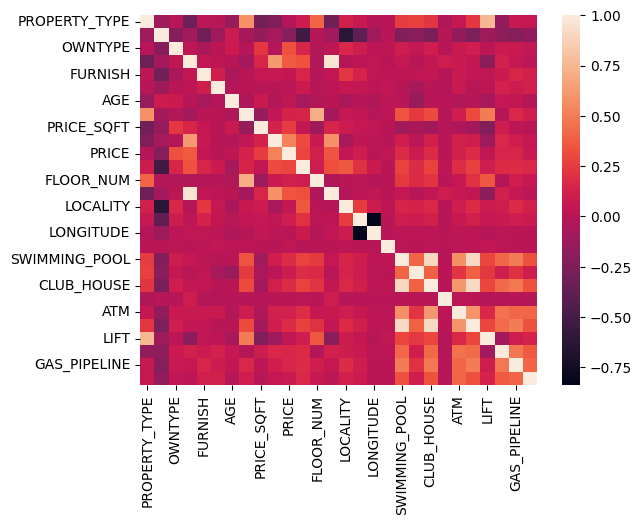

In [10]:
sns.heatmap(data_label_encoded.corr())

In [11]:
fi_df1 = data_label_encoded.corr()['PRICE'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','PRICE':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,CITY,-0.217599
1,OWNTYPE,0.333022
2,BEDROOM_NUM,0.363173
3,FURNISH,0.044849
4,FACING,0.009937
5,AGE,0.029329
6,TOTAL_FLOOR,0.137534
7,PRICE_SQFT,0.247105
8,AREA,0.517991
9,PRICE,1.000000


# **Random Forest Feature Importance**

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
8,PRICE_SQFT,4.736668e-01
9,AREA,3.299947e-01
2,OWNTYPE,3.950512e-02
15,LONGITUDE,2.601979e-02
14,LATITUDE,2.447757e-02
11,FLOOR_NUM,1.498589e-02
7,TOTAL_FLOOR,1.368015e-02
5,FACING,1.178237e-02
13,LOCALITY,8.876029e-03
10,BALCONY_NUM,8.712919e-03


# **Gradient Boosting Feature importances**

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
8,PRICE_SQFT,0.584044
9,AREA,0.369565
15,LONGITUDE,0.010513
7,TOTAL_FLOOR,0.009052
2,OWNTYPE,0.007035
14,LATITUDE,0.006004
3,BEDROOM_NUM,0.003412
10,BALCONY_NUM,0.002071
13,LOCALITY,0.001895
6,AGE,0.001020


# **Permutation Importance**

In [14]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
8,PRICE_SQFT,0.643983
9,AREA,0.586726
2,OWNTYPE,0.069440
14,LATITUDE,0.017023
15,LONGITUDE,0.012393
10,BALCONY_NUM,0.009323
7,TOTAL_FLOOR,0.007708
11,FLOOR_NUM,0.006787
24,WASTE_DISPOSAL,0.006096
13,LOCALITY,0.005955


# **LASSO**

In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
9,AREA,8.582968e+06
2,OWNTYPE,5.362146e+06
8,PRICE_SQFT,2.686671e+06
0,PROPERTY_TYPE,2.232715e+06
3,BEDROOM_NUM,1.982077e+06
7,TOTAL_FLOOR,1.356400e+06
14,LATITUDE,1.195708e+06
15,LONGITUDE,8.670060e+05
17,SWIMMING_POOL,5.610472e+05
6,AGE,5.607977e+05


# **RFE - Recursive Feature Elimination**

In [16]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
8,PRICE_SQFT,4.766652e-01
9,AREA,3.302963e-01
2,OWNTYPE,3.670671e-02
15,LONGITUDE,2.706889e-02
14,LATITUDE,2.564043e-02
11,FLOOR_NUM,1.471593e-02
7,TOTAL_FLOOR,1.239329e-02
5,FACING,1.125344e-02
10,BALCONY_NUM,8.640588e-03
13,LOCALITY,8.307752e-03


# **Linear Regression Weights**

In [17]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
9,AREA,8.582968e+06
2,OWNTYPE,5.362146e+06
8,PRICE_SQFT,2.686671e+06
0,PROPERTY_TYPE,2.232715e+06
3,BEDROOM_NUM,1.982077e+06
7,TOTAL_FLOOR,1.356400e+06
14,LATITUDE,1.195708e+06
15,LONGITUDE,8.670062e+05
17,SWIMMING_POOL,5.610472e+05
6,AGE,5.607977e+05


# **SHAP**

In [18]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.2 MB/s eta 0:00:00


In [19]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-3.48252871e+03, -3.29642594e+05,  1.28428563e+06, ...,
        -2.71739400e+06,  1.11922405e+05, -5.72120337e+04],
       [-1.96549804e+05,  1.67407718e+04,  8.37007434e+05, ...,
        -1.83137012e+04, -2.22315905e+04, -3.94010930e+04],
       [ 3.72893977e+03,  4.87436739e+05,  1.54096166e+06, ...,
         2.30265445e+06, -1.56634342e+04, -4.19722195e+04],
       ...,
       [ 3.26530520e+04, -2.49824617e+04,  8.03957819e+05, ...,
         4.19747179e+04,  7.54229418e+03,  9.05142689e+04],
       [ 3.29561129e+04, -2.62645535e+04,  8.04578624e+05, ...,
         4.02725250e+04, -9.01800838e+02,  8.48409556e+04],
       [-5.28991824e+03, -1.31412549e+03,  5.28767459e+05, ...,
         5.36351367e+04,  1.89675970e+04,  1.32450195e+04]])

In [20]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
8,PRICE_SQFT,8.008878e+06
9,AREA,6.497278e+06
2,OWNTYPE,1.613708e+06
13,LOCALITY,5.232760e+05
15,LONGITUDE,4.068387e+05
14,LATITUDE,2.970810e+05
7,TOTAL_FLOOR,2.577183e+05
11,FLOOR_NUM,2.326122e+05
10,BALCONY_NUM,1.919227e+05
5,FACING,1.359468e+05


In [21]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [22]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
CITY,-0.217599,1.946679e-03,0.000075,-0.000135,-1.486109e+06,1.706810e-03,-1.486109e+06,4.112018e+04
OWNTYPE,0.333022,3.950512e-02,0.007035,0.069440,5.362146e+06,3.670671e-02,5.362146e+06,1.613708e+06
BEDROOM_NUM,0.363173,4.087261e-03,0.003412,0.003546,1.982077e+06,3.876501e-03,1.982077e+06,1.057219e+05
FURNISH,0.044849,4.613554e-03,0.000362,0.000457,4.967200e+04,5.041525e-03,4.967201e+04,5.255272e+04
FACING,0.009937,1.178237e-02,0.000972,0.002505,-4.561336e+04,1.125344e-02,-4.561338e+04,1.359468e+05
AGE,0.029329,7.247240e-03,0.001020,0.002889,5.607977e+05,7.662719e-03,5.607977e+05,9.171822e+04
TOTAL_FLOOR,0.137534,1.368015e-02,0.009052,0.007708,1.356400e+06,1.239329e-02,1.356400e+06,2.577183e+05
PRICE_SQFT,0.247105,4.736668e-01,0.584044,0.643983,2.686671e+06,4.766652e-01,2.686671e+06,8.008878e+06
AREA,0.517991,3.299947e-01,0.369565,0.586726,8.582968e+06,3.302963e-01,8.582968e+06,6.497278e+06


In [23]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [33]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score','corr_coeff','lasso_coeff']].mean(axis=1).sort_values(ascending=False)

feature
PRICE_SQFT        0.375686
AREA              0.338939
OWNTYPE           0.082772
BEDROOM_NUM       0.031550
LATITUDE          0.024640
TOTAL_FLOOR       0.022952
LONGITUDE         0.020010
BALCONY_NUM       0.017853
FLOOR_NUM         0.012251
BHK               0.012086
SWIMMING_POOL     0.011951
WASTE_DISPOSAL    0.011899
GYM               0.010788
GAS_PIPELINE      0.010517
AGE               0.008434
CLUB_HOUSE        0.006498
FACING            0.004801
FURNISH           0.004046
LUXURY            0.003737
ATM               0.003720
POWER_BACKUP      0.003261
NEAR_BANK         0.001879
LIFT              0.000741
LOCALITY         -0.001234
PARKING          -0.001261
CITY             -0.018516
dtype: float64

In [34]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [35]:
scores.mean()

0.7307793067106327

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_label.drop(columns=['CITY','LIFT','NEAR_BANK','FURNISH','PARKING','LOCALITY']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.732741352984586

In [45]:
export_df = X_label.drop(columns=['CITY','LIFT','NEAR_BANK','FURNISH','PARKING','LOCALITY'])
export_df['PRICE'] = y_label

In [46]:
export_df.to_csv('99Acres_gurgaon_hyderabad_Secunderabad_SelectedFeatures.csv', index=False)
